## Descripción del proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

- Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.

- Crear un modelo para predecir el volumen de reservas en pozos nuevos.

- Elegir los pozos petrolíferos que tienen los valores estimados más altos.
 
- Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.


Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

Condiciones:

- Solo se debe usar la regresión lineal para el entrenamiento del modelo.

- Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.

- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.

- Un barril de materias primas genera 4.5 USD de ingresos. 

- El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

- Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. 

- De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

Los datos son sintéticos: los detalles del contrato y las características del pozo no se publican.

### Descripción de datos

Los datos de exploración geológica de las tres regiones se almacenan en archivos:

- geo_data_0.csv.

- geo_data_1.csv. 

- geo_data_2.csv. 

- id — identificador único de pozo de petróleo

- f0, f1, f2 — tres características de los puntos (su significado específico no es importante, pero las características en sí son significativas)

- product — volumen de reservas en el pozo de petróleo (miles de barriles).

## Inicialización

### Cargar librerías

In [1]:
# Cargar librerías
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from statistics import mean 
from sklearn.metrics import mean_squared_error 
import numpy as np 
from numpy.random import RandomState

In [2]:
# Cargar archivos de datos
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
# Vista previa
for df in [df0,df1,df2]:
    print(df.head(3))
    print()

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647

      id         f0        f1        f2     product
0  kBEdx -15.001348 -8.276000 -0.005876    3.179103
1  62mP7  14.272088 -3.475083  0.999183   26.953261
2  vyE1P   6.263187 -5.948386  5.001160  134.766305

      id        f0        f1        f2    product
0  fwXo0 -1.146987  0.963328 -0.828965  27.758673
1  WJtFt  0.262778  0.269839 -2.530187  56.069697
2  ovLUW  0.194587  0.289035 -5.586433  62.871910



In [4]:
# Información general
for df in [df0,df1,df2]:
    print(df.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column

In [5]:
# Descripción general de los datos
for df in [df0,df1,df2]:
    print(df.describe())
    print()

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%      

In [6]:
# correlación entre datos
for df in [df0,df1,df2]:
    print(df.corr())
    print()

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000



###### Hallazgos:

- Es observable una ligera correlación negativa entre la columna **f1** y la columna objetivo **product** en los 3 datasets.

- En el segundo dataset, hay una fuerte correlación, de casi 1, entre la columna **f2** y **product**. En los otros dos datasets también se observa una correlación significativa de la mitad entre estas dos.

- No hay prescencia de valores ausentes en los dataframes y los datos de las columnas son del tipo correcto.

## Preprocesamiento de datos

La columna 'id' es el identificador único de cada pozo, pero no es necesario para este análisis por lo que se procede a  eliminar esta columna de los dataframes para conveniencia.

In [7]:
#Eliminar columnas
df0 = df0.drop('id',axis=1)
df1 = df1.drop('id',axis=1)
df2 = df2.drop('id',axis=1)

Ya con los dataframes listos se proocede al entrenamiento de modelos, en el que se usará el modelo de regresión lineal para los 3 dataframes por la alta precisión y predicibilidad. En el entrenamiento de los modelos, se separarán en un conjunto de entrenamiento y de validación de proporción de 75:25.

## Modelos por Región

### Modelo Región 0 (df_0)

#### Separar datos

In [8]:
# Dividir datos en conjunto de entrenamiento y de validación
df0_train, df0_valid = train_test_split(df0,test_size=0.25,random_state=12345)

In [9]:
# Separar variables de conjunto de entrenamiento
df0_train_features = df0_train.drop('product',axis=1)
df0_train_target =  df0_train['product']

In [10]:
# Separar variables de conjunto de validación
df0_valid_features = df0_valid.drop('product',axis=1)
df0_valid_target =  df0_valid['product']

#### Escalar datos

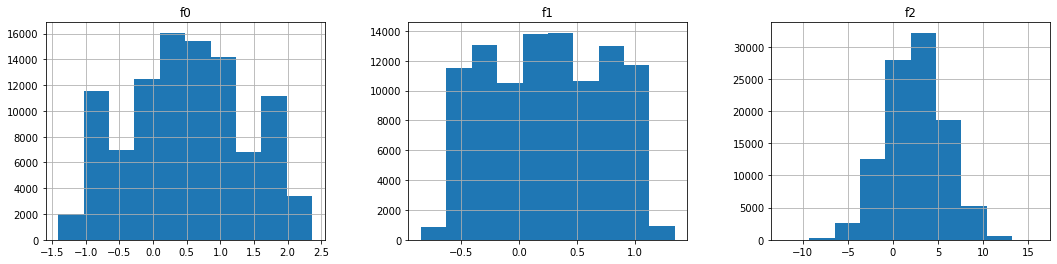

In [11]:
# Visualizar escalas de los datos del df0
plt.subplots(figsize=(18, 4)) 

#enumerate extrae el índice y el nombre de la columna, el índice le dice al subplot dónde poner el gráfico 
for i, column in enumerate(['f0','f1','f2']): 
    df0.hist(column=column, ax=plt.subplot(1, 3, i + 1))
plt.show() 

Las columnas númericas, **f0**, **f1** y **f2**, tienen distintas escalas por lo que se procede a estandarizarlas para darles la misma importancia y mejorar el modelo.

In [12]:
# Escalar datos
numeric = ['f0','f1','f2']
scaler = StandardScaler()
scaler.fit(df0_train_features[numeric]) 

#Escalar las características de todos los conjuntos de datos
df0_train_features[numeric] = scaler.transform(df0_train_features[numeric]) 
df0_valid_features[numeric] = scaler.transform(df0_valid_features[numeric]) 

#Verificar cambios
df0_train_features.head()

,f0,f1,f2
27212,-0.544828,1.390264,-0.094959
7866,1.455912,-0.480422,1.209567
62041,0.260460,0.825069,-0.204865
70185,-1.837105,0.010321,-0.147634
82230,-1.299243,0.987558,1.273181


#### Entrenar modelo

Se crea una función para entrenar el modelo por región y análizarlo.

In [13]:
# Función para el entrenamiento del modelo y analísis
def model_analysis (df_train_features,df_train_target,df_valid_features,df_valid_target):
    #Entrenar modelo
    model = LinearRegression()
    model.fit(df_train_features,df_train_target)
    
    #Predicciones del conjunto de validación
    df_valid_predict = model.predict(df_valid_features)
    print('Promedio de reservas previstas', round(mean(df_valid_predict),3),'(miles de barriles)')
    print()
    
    #Calcular RECM (raíz cuadrada del error cuadrático medio)
    mse = mean_squared_error(df_valid_target,df_valid_predict)
    print("MSE =", round(mse,3))
    print("RMSE =", round(mse ** 0.5,3))
    
    #Prueba de cordura
    predictions = pd.Series(df_train_target.mean(), index=df_valid_target.index)  
    mse = mean_squared_error(df_valid_target, predictions) 
    print()
    print('Mean') 
    print('MSE =', round(mse,3))
    print('RMSE =', round(mse ** 0.5,3))
    
    return model, df_valid_predict

In [14]:
#Aplicar función a los datos de la región 0 (df_0)
model0, df0_valid_predict= model_analysis(df0_train_features,df0_train_target,df0_valid_features,df0_valid_target)
     

Promedio de reservas previstas 92.593 (miles de barriles)

MSE = 1412.213
RMSE = 37.579

Mean
MSE = 1961.568
RMSE = 44.29


- El RMSE al usar la media es de más de 6 mil barriles más que con el conjunto de validación.

- Los RMSE anteriores son cercanos, detalle que disminuye la confiabilidad del modelo.

### Modelo Región 1

#### Separar datos

In [15]:
#Dividir datos en conjunto de entrenamiento y de validación
df1_train, df1_valid = train_test_split(df1,test_size=0.25,random_state=12345)

In [16]:
#Separar variables de conjunto de entrenamiento
df1_train_features = df1_train.drop('product',axis=1)
df1_train_target =  df1_train['product']

In [17]:
#Separar variables de conjunto de validación
df1_valid_features = df1_valid.drop('product',axis=1)
df1_valid_target =  df1_valid['product']

#### Escalar datos

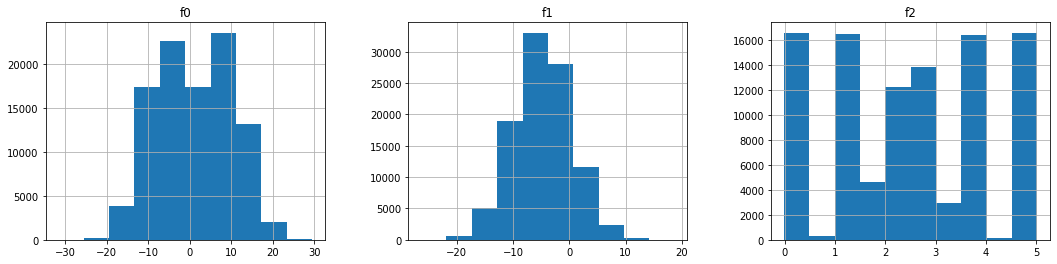

In [18]:
#Visualizar escalas de los datos del df1
plt.subplots(figsize=(18, 4)) 

#enumerate extrae el índice y el nombre de la columna, el índice le dice al subplot dónde poner el gráfico 
for i, column in enumerate(['f0','f1','f2']): 
    df1.hist(column=column, ax=plt.subplot(1, 3, i + 1))
plt.show() 

Las columnas númericas **f0**, **f1** y **f2**, tienen distintas escalas por lo que hay que estandarizarlas para darles la misma importancia y mejorar el modelo.

In [19]:
#Escalar datos
numeric = ['f0','f1','f2']
scaler = StandardScaler()
scaler.fit(df1_train_features[numeric]) 

#Escalar las características de todos los conjuntos de datos
df1_train_features[numeric] = scaler.transform(df1_train_features[numeric]) 
df1_valid_features[numeric] = scaler.transform(df1_valid_features[numeric]) 

#Verificar cambios
df1_train_features.head()

,f0,f1,f2
27212,-0.850855,0.624428,0.296943
7866,1.971935,1.832275,0.294333
62041,1.079305,0.170127,-0.296418
70185,-1.512028,-0.887837,-0.880471
82230,-1.804775,-0.718311,-0.293255


#### Entrenar modelo

In [20]:
#Aplicar función 'model_analysis' a los datos de la región 1
model1, df1_valid_predict= model_analysis(df1_train_features,df1_train_target,df1_valid_features,df1_valid_target)

Promedio de reservas previstas 68.729 (miles de barriles)

MSE = 0.798
RMSE = 0.893

Mean
MSE = 2117.973
RMSE = 46.021


- El RMSE al usar la media es de más de 45 mil barriles más que con el conjunto de validación.

- El modelo tiene un RMSE cercano a cero y muy alejado del de la prueba de cordura, detalle que le da confiabilidad al modelo.

### Modelo Región 2

#### Separar datos

In [21]:
#Dividir datos en conjunto de entrenamiento y de validación
df2_train, df2_valid = train_test_split(df2,test_size=0.25,random_state=12345)

In [22]:
#Separar variables de conjunto de entrenamiento
df2_train_features = df2_train.drop('product',axis=1)
df2_train_target =  df2_train['product']

In [23]:
#Separar variables de conjunto de validación
df2_valid_features = df2_valid.drop('product',axis=1)
df2_valid_target =  df2_valid['product']

#### Escalar datos

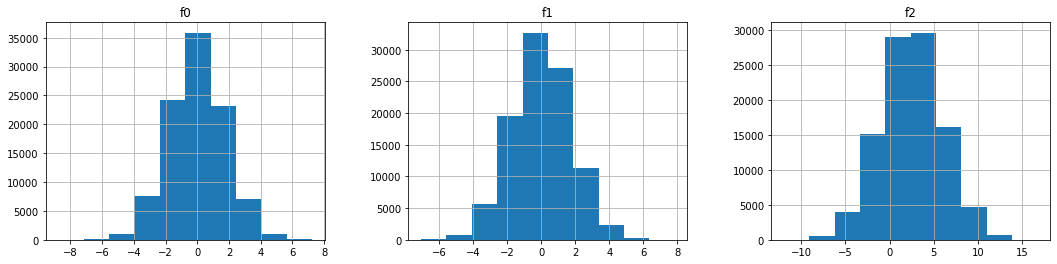

In [24]:
#Visualizar escalas de los datos del df2
plt.subplots(figsize=(18, 4)) 

#enumerate extrae el índice y el nombre de la columna, el índice le dice al subplot dónde poner el gráfico 
for i, column in enumerate(['f0','f1','f2']): 
    df2.hist(column=column, ax=plt.subplot(1, 3, i + 1))
plt.show() 

Las columnas númericas **f0** y **f1** tienen escalas similares, sin embargo la columna **f2** muestra una escala diferente a las otras pues sus valores mínimo y máximo se alejan de los de las otras dos columnas. Hay que estandarizar los datos para darles la misma importancia y mejorar el modelo.

In [25]:
#Escalar datos
numeric = ['f0','f1','f2']
scaler = StandardScaler()
scaler.fit(df2_train_features[numeric]) 

#Escalar las características de todos los conjuntos de datos
df2_train_features[numeric] = scaler.transform(df2_train_features[numeric]) 
df2_valid_features[numeric] = scaler.transform(df2_valid_features[numeric]) 

#Verificar cambios
df2_train_features.head()

,f0,f1,f2
27212,-0.526160,0.776329,-0.400793
7866,-0.889625,-0.404070,-1.222936
62041,-1.133984,0.208576,0.296765
70185,1.227045,1.570166,-0.764556
82230,-0.194289,0.878312,0.840821


#### Entrenar modelo

In [26]:
#Aplicar función a los datos de la región 2
model2, df2_valid_predict= model_analysis(df2_train_features,df2_train_target,df2_valid_features,df2_valid_target)

Promedio de reservas previstas 94.965 (miles de barriles)

MSE = 1602.378
RMSE = 40.03

Mean
MSE = 2016.221
RMSE = 44.902


- El RMSE al usar la media es de más de 4 mil barriles más que con el conjunto de validación.

- Los RMSE anteriores son cercanos, disminuyendo la confiabilidad del modelo.

## Cálculo de ganancias

Considerando que:

- El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares (0.5 millones por pozo).

- Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

### Costo de un pozo

In [27]:
#Cálculo de volumen de reservas para desarrollar un pozo sin pérdidas
costo_200p = 100000000
costo_pozo = costo_200p /200
ingreso = 4500
print('Miles de barriles necesarios para cubrir el costo de un pozo: ', round(costo_pozo / ingreso,2))

Miles de barriles necesarios para cubrir el costo de un pozo:  111.11


Los barriles necesarios para cubrir el costo del desarrollo de un pozo petrólero superan el volumen promedio obtenido en todas las regiones.

### Ganancia de un conjunto de pozos

Se crea una función para calcular la ganancia de un conjunto de pozos donde se le da a la función:

- Volumen generado
- Número de pozos

La función ya cuenta con la información:

- Ingreso por unidad de producto (4500 dólares)
- Costo por pozo

In [28]:
# función 'ganancia' para calcular ganancia
def ganancia(volumen,pozos):
    return (sum(volumen) * ingreso) - (costo_pozo * pozos)

### Ganancia de los mejores pozos por región

Se toma el 10% de las predicciones más altas de volumen por región y se calculan las ganancias de este 10%.



#### Región 0

In [29]:
#Pozos más productivos de la región 0
df0_top10 = df0.sort_values(by='product',ascending=False).head(10000)

#Separar características
df0_top10_features = df0_top10.drop('product',axis=1)

#Predicción del top 10%
df0_top10_predict =  model0.predict(df0_top10_features)

print('Volumen real:',round(sum(df0_top10['product']),3))
print('Volumen promedio real por pozo:',round(mean(df0_top10['product']),3))
print()
print('Volumen predecido:',round(sum(df0_top10_predict),3))
print('Volumen promedio predecido por pozo:', round(mean(df0_top10_predict),3))
print()

#Calcular ganancias 
print ('Ganancia prevista del 10% de los pozos con más volumen de la región 0: ',
        round(ganancia(df0_top10_predict,10000),3),'dólares')
print('Ganancia prevista promedio por pozo, de los pozos con más volumen de la región 0: ',
        round(ganancia(df0_top10_predict,10000)/10000,3),'dólares')

Volumen real: 1646860.876
Volumen promedio real por pozo: 164.686

Volumen predecido: 1989304.8
Volumen promedio predecido por pozo: 198.93

Ganancia prevista del 10% de los pozos con más volumen de la región 0:  3951871600.6 dólares
Ganancia prevista promedio por pozo, de los pozos con más volumen de la región 0:  395187.16 dólares


#### Región 1

In [30]:
#Pozos más productivos de la región 1
df1_top10 = df1.sort_values(by='product',ascending=False).head(10000)

#Separar características
df1_top10_features = df1_top10.drop('product',axis=1)

#Predicción del top 10%
df1_top10_predict =  model1.predict(df1_top10_features)

print('Volumen real:',round(sum(df1_top10['product']),3))
print('Volumen promedio real por pozo:',round(mean(df1_top10['product']),3))
print()
print('Volumen predecido:',round(sum(df1_top10_predict),3))
print('Volumen promedio predecido por pozo:', round(mean(df1_top10_predict),3))
print()

#Calcular ganancias 
print ('Ganancia prevista del 10% de los pozos con más volumen de la región 1: ',
        round(ganancia(df1_top10_predict,10000),3),'dólares')
print('Ganancia prevista promedio por pozo, de los pozos con más volumen de la región 1: ',
        round(ganancia(df1_top10_predict,10000)/10000,3),'dólares')

Volumen real: 1373836.603
Volumen promedio real por pozo: 137.384

Volumen predecido: 3036914.963
Volumen promedio predecido por pozo: 303.691

Ganancia prevista del 10% de los pozos con más volumen de la región 1:  8666117334.966 dólares
Ganancia prevista promedio por pozo, de los pozos con más volumen de la región 1:  866611.733 dólares


#### Región 2

In [31]:
#Pozos más productivos de la región 2
df2_top10 = df2.sort_values(by='product',ascending=False).head(10000)

#Separar características
df2_top10_features = df2_top10.drop('product',axis=1)

#Hacer predicción del top 10%
df2_top10_predict =  model2.predict(df2_top10_features)

print('Volumen real:',round(sum(df2_top10['product']),3))
print('Volumen promedio real por pozo:',round(mean(df2_top10['product']),3))
print()
print('Volumen predecido:',round(sum(df2_top10_predict),3))
print('Volumen promedio predecido por pozo:', round(mean(df2_top10_predict),3))
print()

#Calcular ganancias 
print ('Ganancia prevista del 10% de los pozos con más volumen de la región 2: ',
        round(ganancia(df2_top10_predict,10000),3),'dólares')
print('Ganancia prevista promedio por pozo, de los pozos con más volumen de la región 2: ',
        round(ganancia(df2_top10_predict,10000)/10000,3),'dólares')

Volumen real: 1688627.382
Volumen promedio real por pozo: 168.863

Volumen predecido: 1898568.241
Volumen promedio predecido por pozo: 189.857

Ganancia prevista del 10% de los pozos con más volumen de la región 2:  3543557083.818 dólares
Ganancia prevista promedio por pozo, de los pozos con más volumen de la región 2:  354355.708 dólares


### Riesgos y ganancias para cada región

A continuación, se usa la técnica bootstrapping con 1000 muestras para predecir la ganancia de las 3 regiones.

Se toma en cuenta que al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200.

In [32]:
#Función para calcular ganancia de los mejores 200 pozos
def ganancia_200(target,predicted):
    #Ordenar las mejores predicciones
    sort_pred = predicted.sort_values(ascending=False)
    
    #Seleccionar los mejores 200
    select = target[sort_pred.index][:200]
    
    #Calcular ganancia menos el costo
    return (sum(select) * ingreso) - (costo_pozo * 200)

In [33]:
state = np.random.RandomState(12345)   

#Función para calcular ingresos calculados
def ganancia_bootstrapping(target, predictions):
    predictions = pd.Series(predictions)
    target = target.reset_index(drop=True)
    values = []

    for i in range(1000): #crear 1,000 submuestras  
        pred_subsample = predictions.sample(n=500, replace=True, random_state=state) 
        target_subsample = target[pred_subsample.index] 
        values.append(ganancia_200(target_subsample,pred_subsample))

    values = pd.Series(values)
    mean = round(values.mean(),2)
    print("Ingresos promedio:", mean)
    
    lower = round(values.quantile(.025),2)
    upper = round(values.quantile(.975),2)
    print('Intervalo de confianza del 95%:[',lower,' , ',upper,']')
    
    riesgo = round(len(values[values < 0]) / len(values)*100,2)
    print('Porcentaje de riesgo:',riesgo,'%')
    
    return values

In [34]:
#Ganancias por región
print('Region 0')
ganancias0 = ganancia_bootstrapping(df0_valid_target,df0_valid_predict)
print('\nRegion 1')
ganancias1 = ganancia_bootstrapping(df1_valid_target,df1_valid_predict)
print('\nRegion 2')
ganancias2 = ganancia_bootstrapping(df2_valid_target,df2_valid_predict)

Region 0
Ingresos promedio: 4259385.27
Intervalo de confianza del 95%:[ -1020900.95  ,  9479763.53 ]
Porcentaje de riesgo: 6.0 %

Region 1
Ingresos promedio: 5182594.94
Intervalo de confianza del 95%:[ 1281232.31  ,  9536129.82 ]
Porcentaje de riesgo: 0.3 %

Region 2
Ingresos promedio: 4201940.05
Intervalo de confianza del 95%:[ -1158526.09  ,  9896299.4 ]
Porcentaje de riesgo: 6.2 %


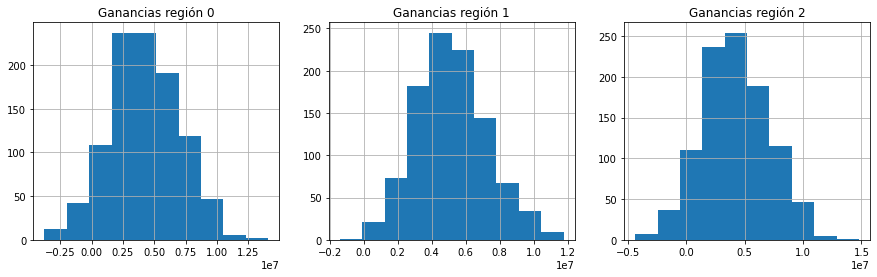

In [35]:
#Gráficas de ganancias por región
plt.subplots(figsize=(15, 4))

ganancias0.hist(ax=plt.subplot(1,3,1))
plt.title('Ganancias región 0')

ganancias1.hist(ax=plt.subplot(1,3,2))
plt.title('Ganancias región 1')

ganancias2.hist(ax=plt.subplot(1,3,3))
plt.title('Ganancias región 2')

plt.show()

## Conclusión / Resultados

### Resultados de los modelos por región

Región 0

- Promedio de reservas previstas 92.593 (miles de barriles)
- RMSE = 37.579
- RMSE prueba de cordura = 44.29

Región 1

- Promedio de reservas previstas 68.729 (miles de barriles)
- RMSE = 0.893
- RMSE prueba de cordura = RMSE = 46.021

Región 2

- Promedio de reservas previstas 94.965 (miles de barriles)
- RMSE = 40.03
- RMSE prueba de cordura = RMSE = 44.902

Las regiones 0 y 2 tienen un promedio de reservas previstas significativamente alto comparado con el de la región 1. Aunque el RMSE de la región 1 es mínimo mientras que el de las otras dos regiones es muy cercano al error de la prueba de cordura cosa que le quita confiabilidad a estos modelos.

### Riesgos y ganancias por región

Region 0

- Ingresos promedio: 4259385.27
- Intervalo de confianza del 95%:[ -1020900.95 , 9479763.53 ]
- Porcentaje de riesgo: 6 %

Region 1

- Ingresos promedio: 5182594.94
- Intervalo de confianza del 95%: [ 1281232.31 , 9536129.82 ]
- Porcentaje de riesgo: 0.3 %

Region 2

- Ingresos promedio: 4201940.05
- Intervalo de confianza del 95%: [ -1158526.09 , 9896299.4 ]
- Porcentaje de riesgo: 6 %

Hay un riesgo mínimo al crear un pozo en la región 1 ya que hay un 95% de probabilidad de no tener pérdidas mientras que en las otras 2 regiones hay un riesgo del 6%. Asimismo, la región con el ingreso promedio mayor es la 1.

### Modelo recomendado

Al analizar los modelos creados, el modelo de la región 1 fue el de mayor confiabilidad. También el examinar los riesgos y ganancias de cada región, las regiones 0 y 2 tienen riesgo de pérdida mientras que el riesgo de la región 1 es mínimo (0.3%) y esta cuenta con el ingreso promedio más alto; por ello, se sugiere la región 1 como la mejor opción para crear nuevos pozos petroleros por su confiabilidad y ganancias predecidas.

## Conclusión general

El proyecto consiste en encontrar los mejores 200 lugares para abrir 200 nuevos pozos de petróleo

### Abrir el dataframe

Con la carga de las librerías apropiadas para el proyecto y una revisión del dataframe, no existe mayor novedad como columnas con tipos de datos diferentes o valores ausentes, etc.

### Preprocesamiento de datos

Se procedió a eliminar la columna 'id' para conveniencia.

### Modelos por región

Con cada uno de los 3 dataframes se procedió a crear un modelo por dataframe en región 0(df_0), región 1 (df_1), y región 2 (df_2). Un conjunto de entrenamiento y uno de validación con proporciones de 75:25.

#### Modelo Región 0

Se separaron los datos y se los escalo por la diferencia que existió en las columnas numéricas **f0, f1 y f2**. Se creó una función llamada 'model_analysis' para el entrenamiento de los modelos.

- El RMSE al usar la media es de más de 45 mil barriles más que con el conjunto de validación.

- El modelo tiene un RMSE cercano a cero y muy alejado del de la prueba de cordura, detalle que le da confiabilidad al modelo.

#### Modelo Región 1

Se separaron los datos y se los escalo por la diferencia que existió en las columnas numéricas **f0, f1 y f2**. Se usó la función 'model_analysis' para entrenar el modelo.

- El RMSE al usar la media es de más de 45 mil barriles más que con el conjunto de validación.

- El modelo tiene un RMSE cercano a cero y muy alejado del de la prueba de cordura, detalle que le da confiabilidad al modelo.

#### Modelo Región 2

Se separaron los datos y se los escalo ya que las columnas númericas **f0** y **f1** tienen escalas similares, sin embargo la columna **f2** muestra una escala diferente a las otras pues sus valores mínimo y máximo se alejan de los de las otras dos columnas. Usando la función 'model_analysis' se entrenó el modelo.

- El RMSE al usar la media es de más de 4 mil barriles más que con el conjunto de validación.

- Los RMSE anteriores son cercanos, disminuyendo la confiabilidad del modelo.

### Cálculo de ganancias

El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares (0.5 millones por pozo).

Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).

Miles de barriles necesarios para cubrir el costo de un pozo:  111.11

Se creó una función llamada 'ganancia' para calcular la ganancia.

Se toma el 10% de las predicciones más altas de volumen por región y se calculan las ganancias de este 10%.

#### Mejores pozos región 0

Volumen real: 1646860.876
Volumen promedio real por pozo: 164.686

Volumen predecido: 1989304.8
Volumen promedio predecido por pozo: 198.93

Ganancia prevista del 10% de los pozos con más volumen de la región 0:  3951871600.6 dólares
Ganancia prevista promedio por pozo, de los pozos con más volumen de la región 0:  395187.16 dólares

#### Mejores pozos región 1

Volumen real: 1373836.603
Volumen promedio real por pozo: 137.384

Volumen predecido: 3036914.963
Volumen promedio predecido por pozo: 303.691

Ganancia prevista del 10% de los pozos con más volumen de la región 1:  8666117334.966 dólares
Ganancia prevista promedio por pozo, de los pozos con más volumen de la región 1:  866611.733 dólares

#### Mejores pozos región 2

Volumen real: 1688627.382
Volumen promedio real por pozo: 168.863

Volumen predecido: 1898568.241
Volumen promedio predecido por pozo: 189.857

Ganancia prevista del 10% de los pozos con más volumen de la región 2:  3543557083.818 dólares
Ganancia prevista promedio por pozo, de los pozos con más volumen de la región 2:  354355.708 dólares

### Riesgo y ganancias para cada región

Se uso la técnica bootstrapping con 1000 muestras para predecir la ganancia de las 3 regiones.

Tomando en cuenta que al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200.

Region 0
Ingresos promedio: 4259385.27
Intervalo de confianza del 95%:[ -1020900.95  ,  9479763.53 ]
Porcentaje de riesgo: 6.0 %

Region 1
Ingresos promedio: 5182594.94
Intervalo de confianza del 95%:[ 1281232.31  ,  9536129.82 ]
Porcentaje de riesgo: 0.3 %

Region 2
Ingresos promedio: 4201940.05
Intervalo de confianza del 95%:[ -1158526.09  ,  9896299.4 ]
Porcentaje de riesgo: 6.2 %

### RMSE por Región

Región 0

- Promedio de reservas previstas 92.593 (miles de barriles)
- RMSE = 37.579
- RMSE prueba de cordura = 44.29

Región 1

- Promedio de reservas previstas 68.729 (miles de barriles)
- RMSE = 0.893
- RMSE prueba de cordura = RMSE = 46.021

Región 2

- Promedio de reservas previstas 94.965 (miles de barriles)
- RMSE = 40.03
- RMSE prueba de cordura = RMSE = 44.902

Las regiones 0 y 2 tienen un promedio de reservas previstas significativamente alto comparado con el de la región 1. Aunque el RMSE de la región 1 es mínimo mientras que el de las otras dos regiones es muy cercano al error de la prueba de cordura cosa que le quita confiabilidad a estos modelos.

### Modelo elegido / recomendado

Al analizar los modelos creados, el modelo de la región 1 fue el de mayor confiabilidad. También el examinar los riesgos y ganancias de cada región, las regiones 0 y 2 tienen riesgo de pérdida mientras que el riesgo de la región 1 es mínimo (0.3%) y esta cuenta con el ingreso promedio más alto; por ello, se sugiere la región 1 como la mejor opción para crear nuevos pozos petroleros por su confiabilidad y ganancias predecidas.